In [ ]:


import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("/content/FloridaBikeRentals.csv", index_col=None)

#Cleaning out any empty values
cleaned_up = df.dropna()
print(cleaned_up)

#Checking for duplicates
duplicates = cleaned_up.duplicated()
#This will print out my total number of duplicates
print(duplicates.sum())

# Checking for empty values
checkdf = cleaned_up.isna()
print(checkdf)


#Changing data types for memory efficiency Humidity
cleaned_up = df.astype({'Temperature': 'float16', 'Humidity': 'float16', 'Wind speed': 'float16'})

cleaned_up.to_json('cleaned_data.json')

#Average rented bikes before noon
before_noon = cleaned_up[cleaned_up['Hour'] > 12]['Rented Bike Count'].mean()
print(before_noon)

#Average rented bikes after noon
after_noon = cleaned_up[cleaned_up['Hour'] < 12]['Rented Bike Count'].mean()
print(after_noon)











            Date  Rented Bike Count  Hour  Temperature  Humidity  Wind speed  \
0     01-12-2017                254     0         -5.2        37         2.2   
1     01-12-2017                204     1         -5.5        38         0.8   
2     01-12-2017                173     2         -6.0        39         1.0   
3     01-12-2017                107     3         -6.2        40         0.9   
4     01-12-2017                 78     4         -6.0        36         2.3   
...          ...                ...   ...          ...       ...         ...   
8755  30-11-2018               1003    19          4.2        34         2.6   
8756  30-11-2018                764    20          3.4        37         2.3   
8757  30-11-2018                694    21          2.6        39         0.3   
8758  30-11-2018                712    22          2.1        41         1.0   
8759  30-11-2018                584    23          1.9        43         1.3   

      Visibility  Dew point temperature

REPORT:
Reviewing the Data I found that most sales occured earlier in the day. Which would likely mean that most people wanted to get the most of their rental by coming in earlier in the day. To increase this they could offer a deal like 3 for 2 on rentals to increase sales. Aswell as for later in the day doing a happy hour sale later on after noon to bump up sales through out the day overall.


In [ ]:

# Here I want to start by multiplying average temp by 10
# This will group every 24 hours up and multiply the mean of them by 10.
# For Standardization
daily_avg_temp = (cleaned_up['Temperature'].groupby(cleaned_up.index // 24).mean() * 10)



#Then I want to normalize Visibility
cleaned_up['Visibility'] = (cleaned_up['Visibility'] - cleaned_up['Visibility'].min()) / (cleaned_up['Visibility'].max() - cleaned_up['Visibility'].min())
print(df['Visibility'])

describe_temp = cleaned_up['Temperature']
print(describe_temp.describe())
print("\n")

describe_vis = cleaned_up['Visibility']
print(describe_vis.describe())
print("\n")

describe_rent = cleaned_up['Rented Bike Count']
print(describe_rent.describe())
print("\n")


print(describe_temp)
print("\n")
print(describe_vis)
print("\n")
print(describe_rent)
print("\n")

# Comparted to the raw data
# Describe() was able to give me quick insights and run a number of
# Useful calculations all in a single go
# Where as the raw data is still good, but needs something
# Like this to make analysis


thatsmytype= cleaned_up.dtypes

print(thatsmytype)

#cleanednprocessed.drop("Unnamed: 0", axis=1, inplace=True)

# Export processed data to csv
cleaned_up.to_csv('cleanednprocessed.csv')
print("Saved to cleanednprocessed.csv ")



0       2000
1       2000
2       2000
3       2000
4       2000
        ... 
8755    1894
8756    2000
8757    1968
8758    1859
8759    1909
Name: Visibility, Length: 8760, dtype: int64
count    8760.000000
mean             inf
std        11.945312
min       -17.796875
25%         3.500000
50%        13.703125
75%        22.500000
max        39.406250
Name: Temperature, dtype: float64


count    8760.000000
mean        0.714559
std         0.308312
min         0.000000
25%         0.462747
50%         0.846934
75%         1.000000
max         1.000000
Name: Visibility, dtype: float64


count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: Rented Bike Count, dtype: float64


0      -5.199219
1      -5.500000
2      -6.000000
3      -6.199219
4      -6.000000
          ...   
8755    4.199219
8756    3.400391
8757    2.599609
8758    2.099609
8759    1.900391
Name: Te

/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:52: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


REPORT:  Now with that variable I can print it out and see that
 I have a few object datatypes. That If I wanted to work with them
 For additional analysis I would need to convert them over to Catergorical
 Or numerical so that I can work with the at the same time.
 EX: Seasons, Holiday, Data, and
 Functioning Day Could be converted to a boolean data to 1 or 0.

In [ ]:
# Dtype Check for; Seasons, Functioning Day, Holiday
seasons_is = df.dtypes['Seasons']
print(seasons_is)

holiday_is = df.dtypes['Holiday']
print(holiday_is)

functioning_day_is = df.dtypes['Functioning Day']
print(functioning_day_is)

#All columns check are Categorical Data

print("\n")

# Now Want avg bikes rented in each season of the year

winter_avg = cleaned_up[cleaned_up['Seasons'] == 'Winter']['Rented Bike Count'].mean()
print("Through the Winter the average number of bikes rented was: ", winter_avg)

spring_avg = cleaned_up[cleaned_up['Seasons'] == 'Spring']['Rented Bike Count'].mean()
print("During the Spring the average number of bikes rented was: ", spring_avg)

summer_avg = cleaned_up[cleaned_up['Seasons'] == 'Summer']['Rented Bike Count'].mean()
print("Through the Summer the average number of bikes rented was: ", summer_avg)

autumn_avg = cleaned_up[cleaned_up['Seasons'] == 'Autumn']['Rented Bike Count'].mean()
print("Through Autumn the average number of bikes rented was: ", autumn_avg)

print("\n")

cleanednprocessed = pd.read_csv("/content/cleanednprocessed.csv")

makes_sense = cleanednprocessed.groupby('Hour')[['Temperature', 'Rented Bike Count']].mean()
print(makes_sense)

print("\n")

seasons_bikes = cleanednprocessed.groupby('Seasons')[['Rented Bike Count']].mean()
print(seasons_bikes)

encoded_data = pd.get_dummies(cleanednprocessed, columns=['Seasons', 'Holiday', 'Functioning Day'])
encoded_data_to_csv = encoded_data.to_csv('Rental_Bike_Data_Dummy.csv.csv')
print("\n The encoded data has been saved to Rental_Bike_Data_Dummy.csv ")


object
object
object


Through the Winter the average number of bikes rented was:  225.5412037037037
During the Spring the average number of bikes rented was:  730.03125
Through the Summer the average number of bikes rented was:  1034.0733695652175
Through Autumn the average number of bikes rented was:  819.5979853479854


      Temperature  Rented Bike Count
Hour                                
0       11.286301         541.460274
1       10.923288         426.183562
2       10.591507         301.630137
3       10.293699         203.331507
4       10.026301         132.591781
5        9.768767         139.082192
6        9.560548         287.564384
7        9.581096         606.005479
8       10.176986        1015.701370
9       11.375890         645.983562
10      12.910137         527.821918
11      14.310137         600.852055
12      15.462192         699.441096
13      16.255616         733.246575
14      16.816712         758.824658
15      17.036164         829.186301
16      1

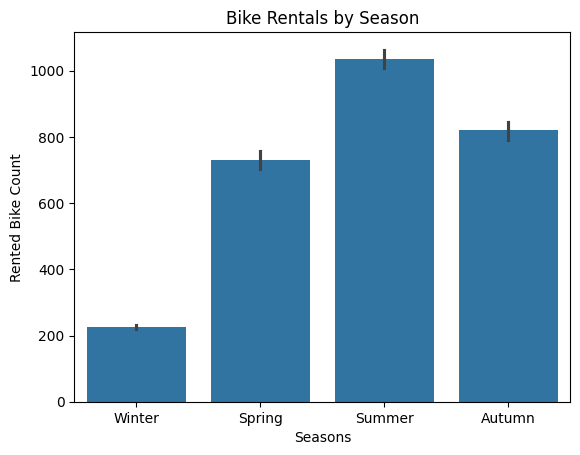

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar graph for avg. Rentals by each season
cleanednprocessed.groupby('Seasons')['Rented Bike Count'].mean()
sns.barplot(x='Seasons', y='Rented Bike Count', data=cleanednprocessed)
plt.title('Bike Rentals by Season')
plt.savefig('barplot.png')
plt.show()


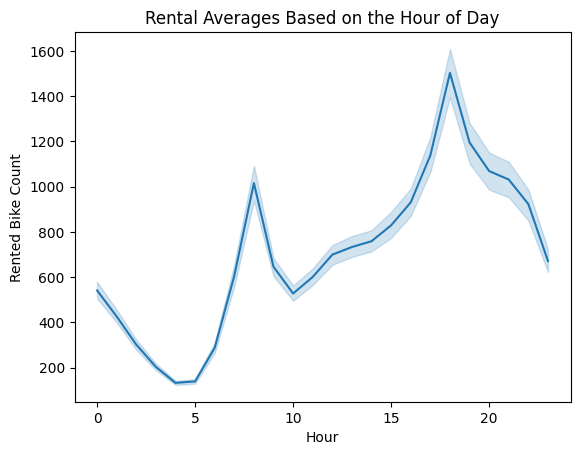

In [ ]:
# Lineplot Showing Peak times and Slow times by the hour of the day from 1-24 Hours of the Day on Avg.
cleanednprocessed.groupby('Hour')['Rented Bike Count'].mean()
sns.lineplot(x='Hour', y='Rented Bike Count', data=cleanednprocessed)
plt.title('Rental Averages Based on the Hour of Day')
plt.savefig('lineplot.png')
plt.show()

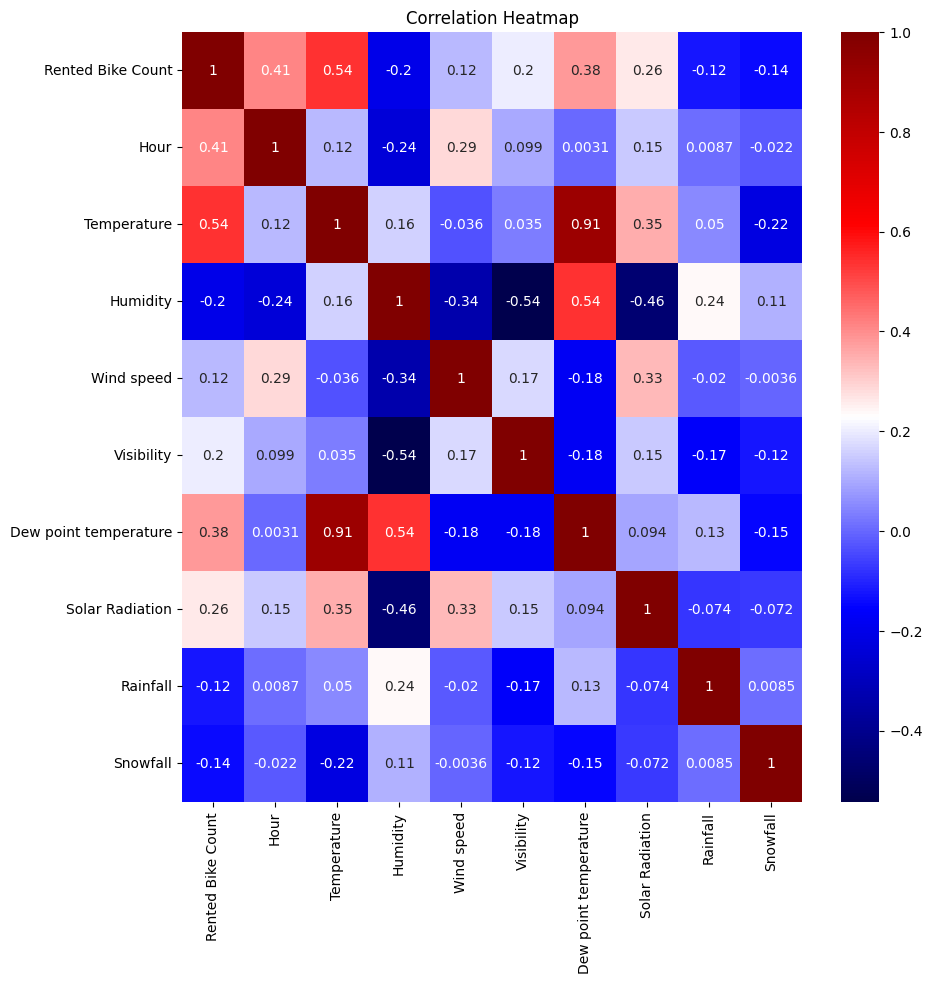

In [ ]:
# Heatmap showing Correlation among numerical Variables
del cleanednprocessed['Unnamed: 0']
# Grabbing only number datatypes
only_numeric = cleanednprocessed.select_dtypes(include=["number"])

# Establishing correlation
correlation_numeric = only_numeric.corr()

# Plotting heatmap and setting the format I want and customization
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_numeric,annot=True, cmap='seismic')
plt.title('Correlation Heatmap')
plt.savefig('heatmap.png')
plt.show()


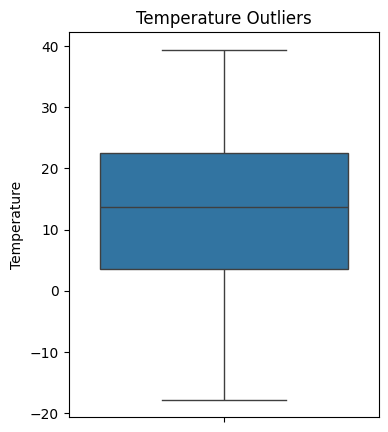

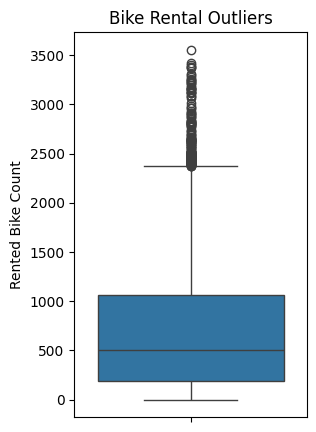

In [ ]:
# Box Plot showing to identify outliers in Temp. and Bike Rentals

plt.figure(figsize=(4, 5))
plt.title('Temperature Outliers')

sns.boxplot(y=cleanednprocessed['Temperature'])
plt.savefig('tempoutliers.png')
plt.show()

plt.figure(figsize=(3,5))
plt.title('Bike Rental Outliers')
sns.boxplot(y=cleanednprocessed['Rented Bike Count'])
plt.show()


**INSIGHTS**
Looking at the data visuals above, I observed a few things.

 Like peak season for the bike rental shop being in the summer and winding down as the weather cools off through out each season and back up again for the shop as the summer rolls back around.

Then I also noticed from the data the there are 2 busiest times for the shop with a busiest time in the evening on average and looking at the outliers their are times where the shop is incredibly busy but usually will at minimum do over 500 rentals a day all year round.